In [ ]:
#try next 
#https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.combat.html
#here with combat you can protect covariates from removing variants that could also explained by these covariates

In [1]:
#https://scanpy-tutorials.readthedocs.io/en/latest/paga-paul15.html
import scanpy as sc
import scirpy as ir
import bbknn
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from matplotlib import rcParams

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

In [3]:
path_filtered = '../preprocessing/hmgu_data_preproc/01_filtered_data.h5ad'
path_normalized = '../preprocessing/hmgu_data_preproc/02_normalized_data.h5ad'
path_high_var = '../preprocessing/hmgu_data_preproc/03_variableGenes_data.h5ad'
path_tcr = '../preprocessing/hmgu_data_preproc/04_merged_data.h5ad'
path_tcr_filtered = '../preprocessing/hmgu_data_preproc/05_tcr_filtered_data.h5ad'
path_tcr_anno = '../preprocessing/hmgu_data_preproc/06_tcr_annotation_data.h5ad'

adata = sc.read(path_tcr_anno)


In [4]:
adata

AnnData object with n_obs × n_vars = 10954 × 5000
    obs: 'Sample', 'donor', 'organ', 'sort', 'method', 'file', 'is_TRA_p', 'is_TRB_p', 'is_TRA_np', 'is_TRB_np', 'Age', 'Source', 'cell types', 'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'multi_chain', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_

In [43]:
adata.obs.groupby('Source')['Age'].value_counts()

Source     Age
HDBR       14w    1459
           17w    1378
           11w     947
           13w     940
           12w     848
           16w     565
Newcastle  30m    3349
           10m     477
nan        nan     991
Name: Age, dtype: int64

In [5]:
#maybe skip this since we are using the already preprocessed data
#sc.pp.recipe_zheng17(adata)

In [6]:
#sc.tl.pca(adata, svd_solver='arpack')

In [7]:
#sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)# fails with these params

sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


sc.tl.draw_graph(adata)


         Falling back to preprocessing with `sc.pp.pca` and default params.


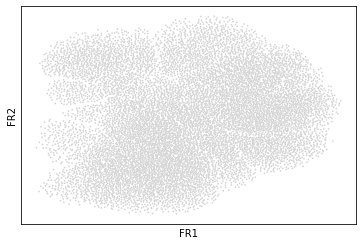

In [8]:
#sc.pl.draw_graph(adata, color='paul15_clusters', legend_loc='on data')
sc.pl.draw_graph(adata, legend_loc='on data')


In [9]:
#optional denoising

#try to find a way for this to work uncommented later

sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')


In [10]:
sc.tl.draw_graph(adata)


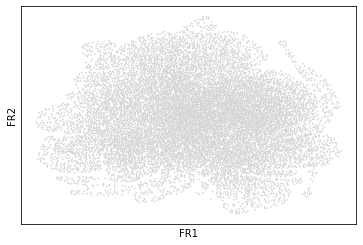

In [11]:
#sc.pl.draw_graph(adata, color='paul15_clusters', legend_loc='on data')

sc.pl.draw_graph(adata, legend_loc='on data')

#end optional denoising


In [12]:
sc.tl.leiden(adata, resolution=1.0)


In [13]:
sc.tl.paga(adata, groups='leiden')


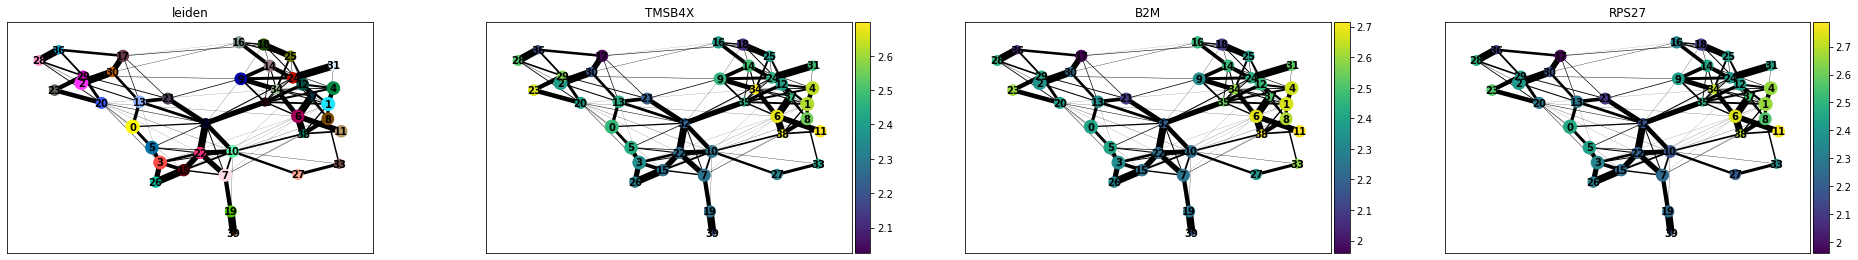

In [14]:
#sc.pl.paga(adata, color=['leiden', 'Hba-a2', 'Elane', 'Irf8'])
sc.pl.paga(adata, color=['leiden', 'TMSB4X','B2M','RPS27'])


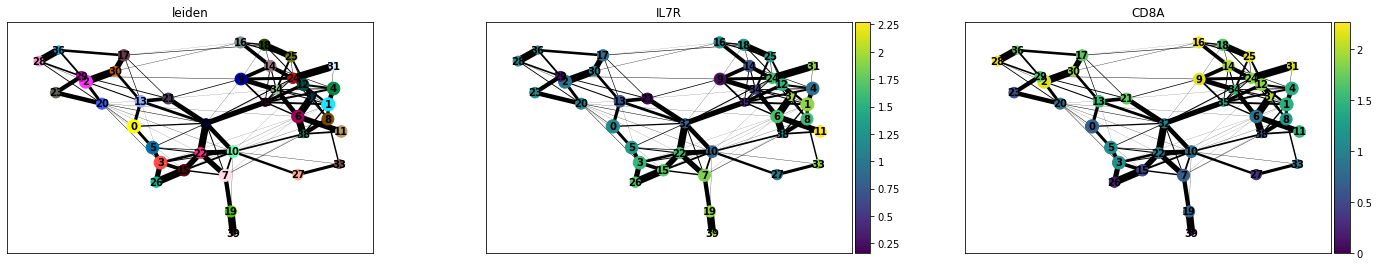

In [15]:
sc.pl.paga(adata, color=['leiden', 'IL7R', 'CD8A'])


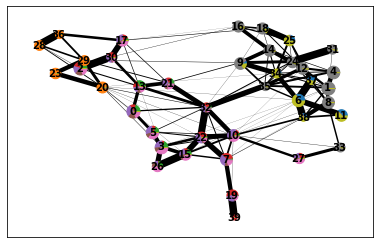

In [16]:
sc.pl.paga(adata, color=['Age'])


#look in adata obs for cluster categories, and use count value command to see age of clusters
#pick root node as earliest cells

In [17]:
adata.obs['leiden'].cat.categories


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39'],
      dtype='object')

In [18]:

adata.obs['leiden_anno'] = adata.obs['leiden']


In [19]:
#adata.obs['leiden_anno'].cat.categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10/Ery', '11', '12',
 #      '13', '14', '15', '16/Stem', '17', '18', '19/Neu', '20/Mk', '21', '22/Baso', '23', '24/Mo']
    
adata.obs['leiden_anno'].cat.categories =['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39']



In [20]:
sc.tl.paga(adata, groups='leiden_anno')


<Axes:>

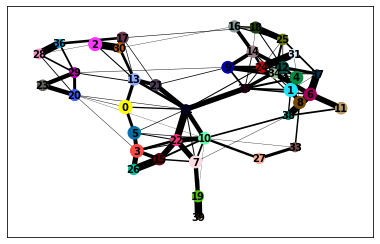

In [21]:
sc.pl.paga(adata, threshold=0.03, show=False)


In [22]:
sc.tl.draw_graph(adata, init_pos='paga')


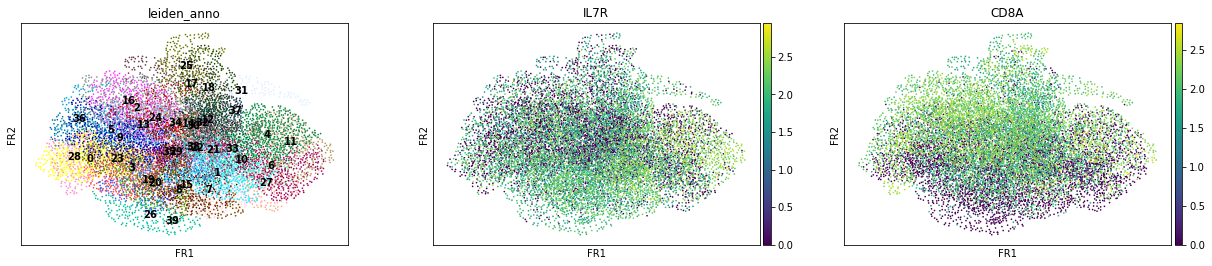

In [23]:
sc.pl.draw_graph(adata, color=['leiden_anno', 'IL7R', 'CD8A'], legend_loc='on data')



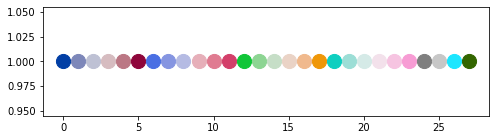

In [24]:
pl.figure(figsize=(8, 2))
for i in range(28):
    pl.scatter(i, 1, c=sc.pl.palettes.zeileis_28[i], s=200)
pl.show()




In [25]:
#Reconstructing gene changes along PAGA paths for a given set of genes
#some diffusin psuedotime as well


#32 looks like the best root cell based on the trajectory graphs
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == '36')[0]



In [26]:
sc.tl.dpt(adata)


In [27]:
#Select some of the marker gene names.

gene_names = ['IL7R', 'CD8A']  


In [28]:
adata_raw = sc.read(path_tcr_anno)
#sc.pp.log1p(adata_raw)
#sc.pp.scale(adata_raw)
adata.raw = adata_raw



In [29]:
"""
o avoid that, you can look up, where neighbors and distances are stored in the adata object 
(for that print keys from adata.uns, adata.obsm, adata.obsp)
and remove everything that looks like it could be ralted to neighbors.
"""
print(adata.uns.keys())
print(adata.obsm.keys())
print(adata.obsp.keys())

dict_keys(['aa_to_id', 'hvg', 'neighbors', 'draw_graph', 'diffmap_evals', 'leiden', 'paga', 'leiden_sizes', 'leiden_colors', 'Age_colors', 'leiden_anno_sizes', 'leiden_anno_colors', 'iroot'])
KeysView(AxisArrays with keys: X_umap, X_umap_3d, one_hot, tcr_seq, X_pca, X_draw_graph_fr, X_diffmap)
KeysView(PairwiseArrays with keys: distances, connectivities)


In [30]:
del adata.uns['neighbors']
del adata.uns['draw_graph']#del adata.uns['diffmap_evals']

print(adata.uns.keys())



dict_keys(['aa_to_id', 'hvg', 'diffmap_evals', 'leiden', 'paga', 'leiden_sizes', 'leiden_colors', 'Age_colors', 'leiden_anno_sizes', 'leiden_anno_colors', 'iroot'])


In [ ]:
del adata.obsm['X_umap']
del adata.obsm['X_umap_3d']
del adata.obsm['X_pca']
del adata.obsm['X_draw_graph_fr']
del adata.obsm['X_diffmap']
print(adata.obsm.keys())


In [32]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

"""
sc.tl.diffmap(adata)
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, legend_loc='on data')
sc.tl.umap(adata)
"""
#should we call these commands before or after batch correction? graphs look very different depending
#i think it is more correct to call these after batch correction


sc.pp.pca(adata)


         Falling back to preprocessing with `sc.pp.pca` and default params.


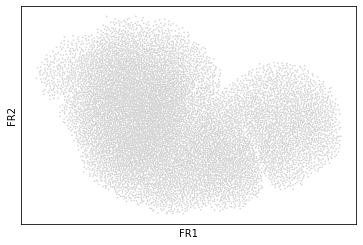

In [33]:
bbknn.bbknn(adata, batch_key='Source')

sc.tl.diffmap(adata)
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, legend_loc='on data')
sc.tl.umap(adata)
#if this doesnt work try renaming ntress with annoyntrees
#https://github.com/Teichlab/bbknn/issues/41
#https://github.com/theislab/scanpy/pull/1868

#error in bbknn_pca_matrix


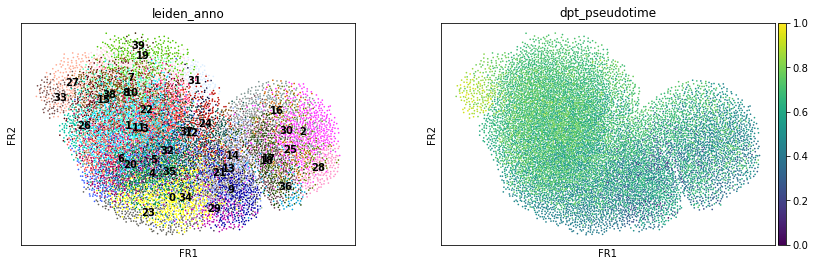

In [34]:
sc.pl.draw_graph(adata, color=['leiden_anno', 'dpt_pseudotime'], legend_loc='on data')

#?????????????/ why do i get a cluster graph here and not a trajectory graph like the tutorial
#cant tell from our graph what our trajectories of interest are

In [ ]:
#sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
#graph looks the same, so it seems to have grabbed the old version -try without running the noising step with xdiff

#I think this needs to be commented out for the batch correction to work, not sure but trying 
#with this commented in, batch correction appears to have no affect ie the umaps for this file are the same 
#as for trajectory_withdiffmap (the one without batch correction)

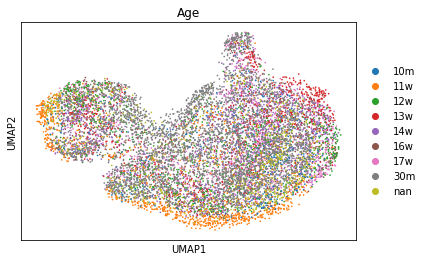

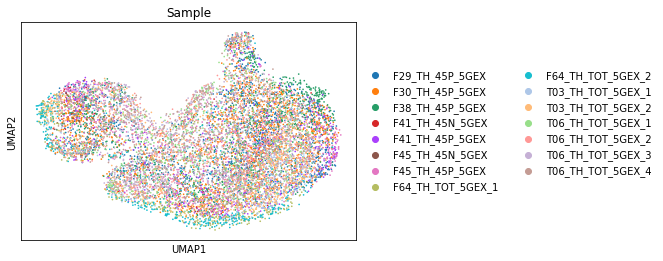

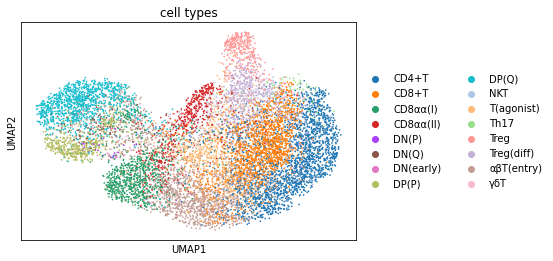

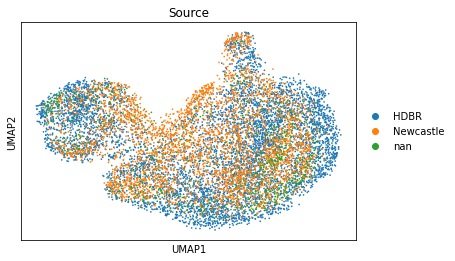

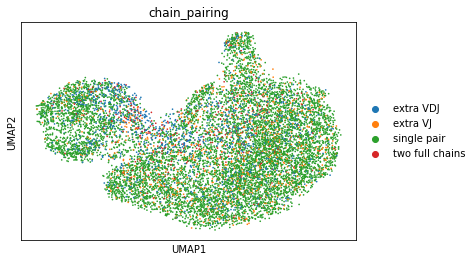

In [35]:
#sc.pl.umap(adata, color=['dpt_pseudotime'])
sc.pl.umap(adata, color=['Age'])
sc.pl.umap(adata, color=['Sample'])
sc.pl.umap(adata, color=['cell types'])
sc.pl.umap(adata, color=['Source'])
sc.pl.umap(adata, color=['chain_pairing'])


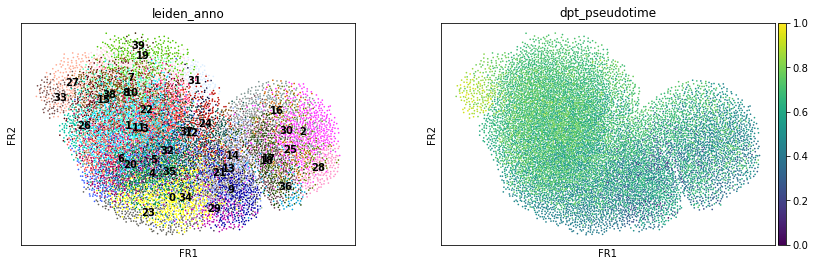

In [36]:
sc.pl.draw_graph(adata, color=['leiden_anno', 'dpt_pseudotime'], legend_loc='on data')

In [37]:
"""paths = [('erythrocytes', [16, 12, 7, 13, 18, 6, 5, 10]),
         ('neutrophils', [16, 0, 4, 2, 14, 19]),
         ('monocytes', [16, 0, 4, 11, 1, 9, 24])]
         """

paths = [('1cluster', [28,36,17,29,23,20,2,30]),
         ('2cluster', [13,21,32,0,5,3,26,15,22,10,7,39]),
         ('3cluster', [27,33,38,11,1,8,6,4,35,34,12,37,9,24,31,14,31,16,18,25])]

In [38]:
adata.obs['distance'] = adata.obs['dpt_pseudotime']

In [39]:
adata.obs['clusters'] = adata.obs['leiden_anno']  # just a cosmetic change

In [40]:
adata.uns['clusters_colors'] = adata.uns['leiden_anno_colors']

ValueError: setting an array element with a sequence.

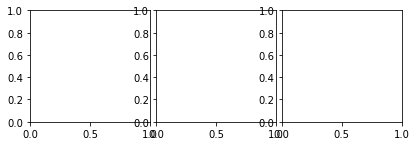

In [41]:
_, axs = pl.subplots(ncols=3, figsize=(6, 2.5), gridspec_kw={'wspace': 0.05, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata, path, gene_names,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        groups_key='clusters',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
    data.to_csv('./write/paga_path_{}.csv'.format(descr))
pl.show()

In [ ]:
#adata.obs['Source']
hdbr = adata[adata.obs.Source =='HDBR', :]
newc= adata[adata.obs.Source =='Newcastle', :]


print(hdbr.obs['Age'])
#Name: Age, Length: 6137, dtype: category
#Categories (6, object): ['11w', '12w', '13w', '14w', '16w', '17w']
print(newc.obs['Age'])
#Name: Age, Length: 3826, dtype: category
#Categories (2, object): ['10m', '30m']

#adata.obs['leiden_anno']
for i in range(0,40):
    print(i)
    x=adata[adata.obs.leiden_anno ==str(i), :]
    print(x.obs['Age'])

#the two most promising for youngest cluster are cluster 36 with only 11 week data and cluster 23 with only 11 and 13 data
#we will set the root cluster as 36


